In [18]:

import ctypes
import sys
import os 
import time
import numpy as np
from ctypes import POINTER
import matplotlib.pyplot as plt
from mc_for_bimetric import log_likelihood,log_post
import emcee
from schwimmbad import MPIPool
from mpi4py import MPI

import matplotlib.gridspec as gridspec


cwd =  os.getcwd()
lib_h = ctypes.CDLL(cwd + "/friedmann_Cs_lib.so") 




def load_data(fname="/home/manvendra/post_doc_ahduni/sim/mod_grav/data/data.txt"):
    f = np.genfromtxt(fname,delimiter="\t")
    z = np.squeeze(f[:,0])
    fs8_data = np.squeeze(f[:,1])
    fs8_sig2 = np.square(np.squeeze(f[:,2]))
    om_fid = np.squeeze(f[:,3])
    
    c = np.diag(fs8_sig2)
    c[5,5] = 6.4000*0.001
    c[4,4] = 3.969*0.001
    c[3,3] = 5.184*0.001
    c[4,5] = 2.570*0.001
    c[3,5] = 0.000
    c[5,4] = 2.570*0.001
    c[3,4] = 2.540*0.001
    c[5,3] = 0.000*0.001
    c[4,3] = 2.540*0.001
    
    c_i = np.linalg.inv(c)
    rat_den = np.sqrt(om_fid*np.power(1.0+z,3.0)+(1.0-om_fid))
    mz = -1.0*z
    sa = mz.argsort()
    sa_inv = mz.argsort().argsort()
    
    cn = np.array([1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,3,3,3])
    
    return z,fs8_data,c_i,rat_den,sa,sa_inv,cn
    
    



z,f,ci,r,s,si,cn = load_data()



In [19]:
l = log_post([0.4,0.79,0.79],z,f,r,ci,cn,s,si)

In [20]:
lst=[]
ilst = []
for i in np.arange(0.0,1.0,0.1):
    l = -log_post([.2791,0.79,i],z,f,r,ci,cn,s,si)
    lst.append(l)
    ilst.append(i)
    print(i,l)
    

0.0 12.139859261818819
0.1 12.169142262495681
0.2 12.274775583770966
0.30000000000000004 12.508401429021486
0.4 12.950714951327363
0.5 13.704423473282679
0.6000000000000001 14.88605113761441
0.7000000000000001 16.617551991904772
0.8 19.01835468245177
0.9 22.198094967961485


In [21]:
fi = 1.69038
fl = -log_post([.2791,0.79,fi],z,f,r,ci,cn,s,si)
def plot_l(c=10):
    fig=plt.figure(figsize=(12.0,9.5), dpi=80)
    #fig.suptitle('Overdensity at turn around', fontsize=14, fontweight='bold')
    gs = gridspec.GridSpec(1, 1)
    ax1 = plt.subplot(gs[0, 0])
    ax1.set_ylabel(r"$\chi^2$",fontsize=40)
    ax1.set_xlabel("$B1$",fontsize=40)
    #ax1.set_xscale('log')
    ax1.tick_params(axis='both', which='major',labelsize=13)
    
    i=0
    ax1.plot(ilst,lst)
    ax1.plot(fi,fl,"ro",label="fitted")
    
       
    
    
    ax1.legend(loc='best',frameon=False, fontsize=20)

    fig.savefig("lkl_chi.pdf",dpi=fig.dpi,bbox_inches='tight')

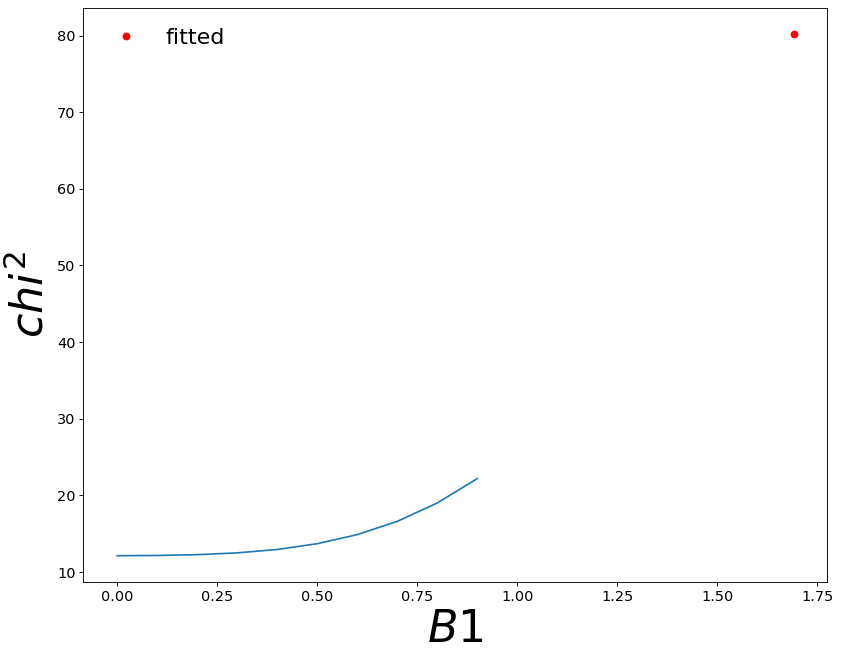

In [22]:
plot_l()